<a href="https://colab.research.google.com/github/hossaini2972-coder/Online_Retail_analysis/blob/main/Retail_store_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

# 1. Load data
# Ensure 'online_retail.csv' is uploaded to your Colab session or provide the correct path.
df = pd.read_csv("Online Retail.csv", encoding='latin1')

# 2. Remove cancelled invoices (InvoiceNo starting with C or A)
df = df[~df["InvoiceNo"].astype(str).str.startswith(("C", "A"))]

# 3. Remove negative or zero quantity
df = df[df["Quantity"] > 0]

# 4. Remove zero or negative unit price
df = df[df["UnitPrice"] > 0]

# 5. Drop rows with missing CustomerID
df = df.dropna(subset=["CustomerID"])

# 6. Clean text columns
df["Description"] = df["Description"].str.strip().str.title()
df["Country"] = df["Country"].str.strip().str.title()

df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors="coerce")

# Drop rows where date conversion failed
df = df.dropna(subset=["InvoiceDate"])

df["TotalSales"] = df["Quantity"] * df["UnitPrice"]
df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.month
df["MonthName"] = df["InvoiceDate"].dt.month_name()

df = df.reset_index(drop=True)
df.to_csv("online_retail_cleaned.csv", index=False)

print(" Data cleaning completed successfully!")
print("Final shape:", df.shape)


 Data cleaning completed successfully!
Final shape: (91780, 12)


In [9]:
from google.colab import files

files.download('online_retail_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

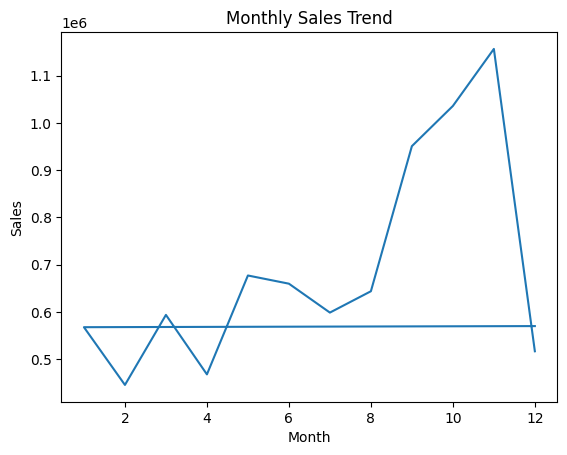

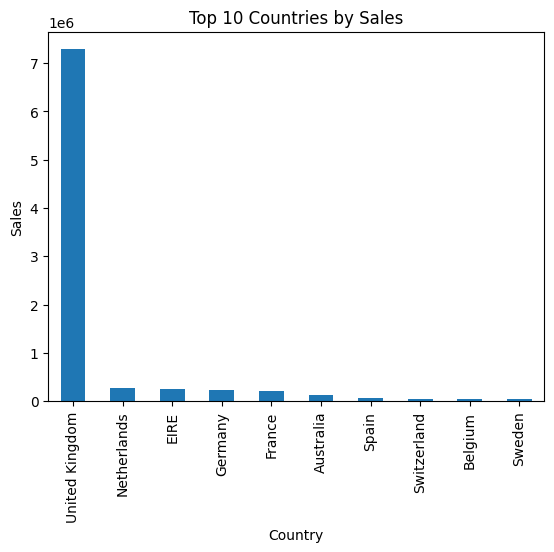

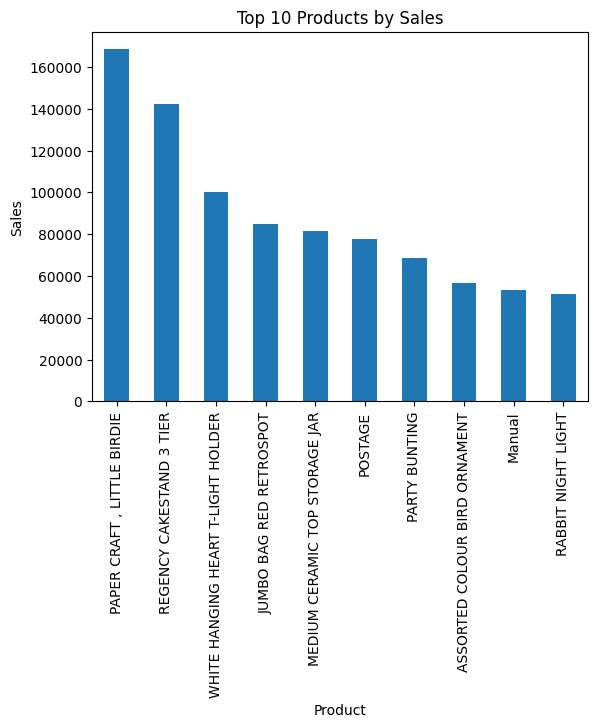

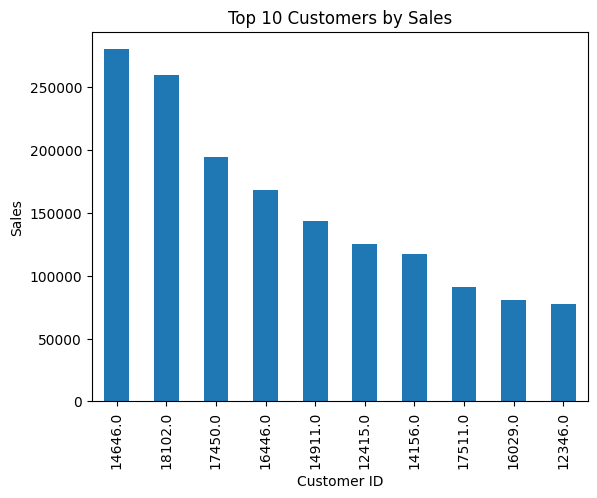

Data cleaned & visualized successfully


In [12]:
import pandas as pd
import matplotlib.pyplot as plt


# 1. Load Data
df = pd.read_csv("Online Retail.csv", encoding="latin1")

# 2. Data Cleaning

# Drop null values
df.dropna(inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert InvoiceDate to datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Remove negative quantity & zero price (returns)
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]

# 3. Feature Engineering

# Sales column
df["Sales"] = df["Quantity"] * df["UnitPrice"]

# Date features
df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.month
df["Month_Name"] = df["InvoiceDate"].dt.strftime("%b")

# 4. VISUALIZATIONS

#  Monthly Sales Trend
monthly_sales = df.groupby(["Year", "Month"])["Sales"].sum().reset_index()

plt.figure()
plt.plot(monthly_sales["Month"], monthly_sales["Sales"])
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

#  Sales by Country (Top 10)
country_sales = df.groupby("Country")["Sales"].sum().sort_values(ascending=False).head(10)

plt.figure()
country_sales.plot(kind="bar")
plt.title("Top 10 Countries by Sales")
plt.xlabel("Country")
plt.ylabel("Sales")
plt.show()

# Top 10 Products by Sales
product_sales = df.groupby("Description")["Sales"].sum().sort_values(ascending=False).head(10)

plt.figure()
product_sales.plot(kind="bar")
plt.title("Top 10 Products by Sales")
plt.xlabel("Product")
plt.ylabel("Sales")
plt.show()

#  Top 10 Customers by Revenue
customer_sales = df.groupby("CustomerID")["Sales"].sum().sort_values(ascending=False).head(10)

plt.figure()
customer_sales.plot(kind="bar")
plt.title("Top 10 Customers by Sales")
plt.xlabel("Customer ID")
plt.ylabel("Sales")
plt.show()

# ---------------------------
# 5. Save Cleaned Data
# ---------------------------
df.to_csv("cleaned_online_retail.csv", index=False)

print("Data cleaned & visualized successfully")